## Student Performance Indicator
### Life cycle of Machine learning Project
* Understanding the Problem Statement

* Data Collection

* Data Checks to perform

* Exploratory data analysis

* Data Pre-Processing

* Model Training

* Choose best model

### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

## 3.1 Check Missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

## 3.3 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

gender: 2 unique values
race_ethnicity: 5 unique values
parental_level_of_education: 6 unique values
lunch: 2 unique values
test_preparation_course: 2 unique values


## 3.4 STats of dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

## 3.5 types of datatype

In [11]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

## 3.6 EXPLORING DATA

In [12]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()} ")

gender: ['female' 'male'] 
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E'] 
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
lunch: ['standard' 'free/reduced'] 
test_preparation_course: ['none' 'completed'] 


In [13]:
# DEFINING NUMERICAL AND CATEGORICAL COLUMNS
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns
print("Numerical columns: " , len(num_cols) , num_cols)
print("Categorical columns:" , len(cat_cols), cat_cols)

Numerical columns:  3 Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
Categorical columns: 5 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
#ADDING NEW FEATURES LIKE TOTAL SCORE AND AVERAGE SCORE
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full_marks = df[df['reading_score']==100]['average_score'].count()
writing_full_marks = df[df['writing_score']==100]['average_score'].count()
math_full_marks = df[df['math_score']==100]['average_score'].count()

print(f"Number of students with full marks in reading: {reading_full_marks}")
print(f"Number of students with full marks in writing: {writing_full_marks}")
print(f"Number of students with full marks in math: {math_full_marks}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

## 4. Exploring Data ( Visualization )
### 4.1 Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

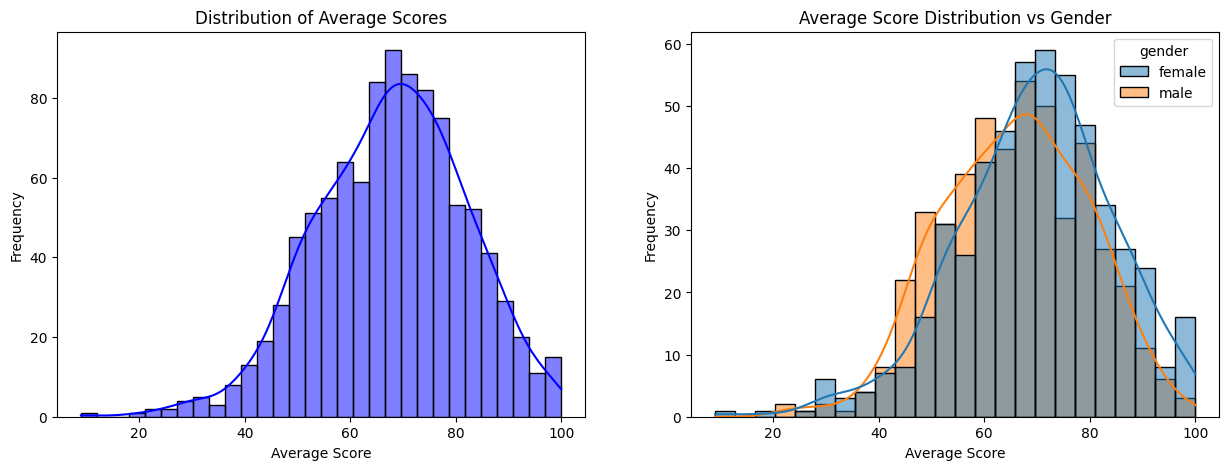

In [18]:
fig , axs = plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
sns.histplot(df['average_score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(122)

sns.histplot(data=df, x='average_score', kde=True, hue='gender', color='green')
plt.title('Average Score Distribution vs Gender')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()



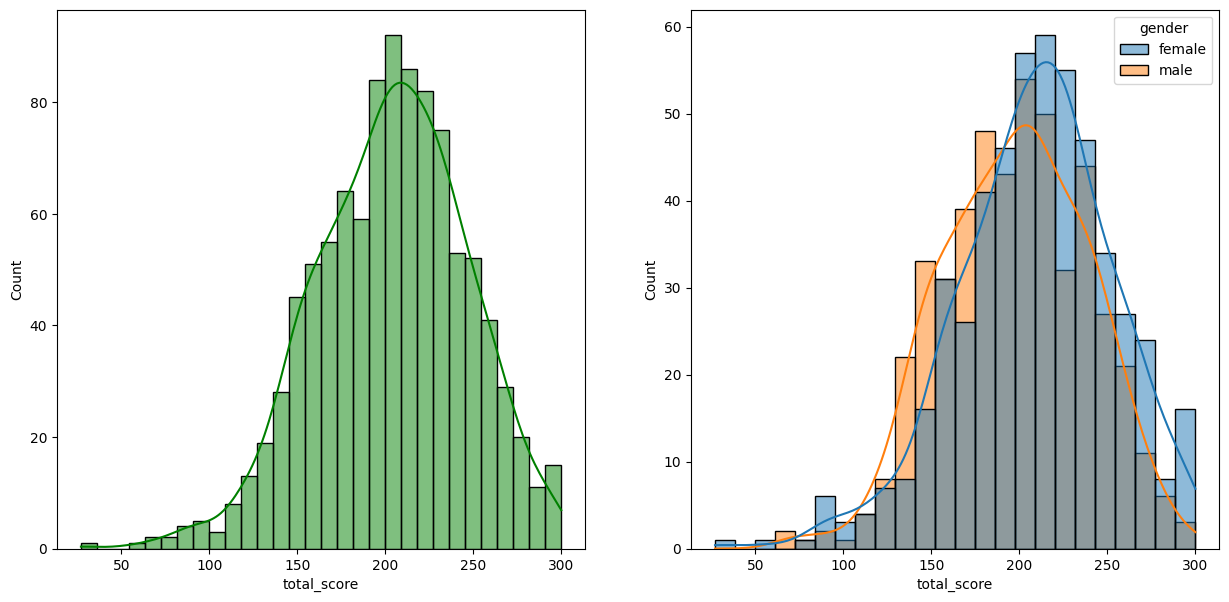

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

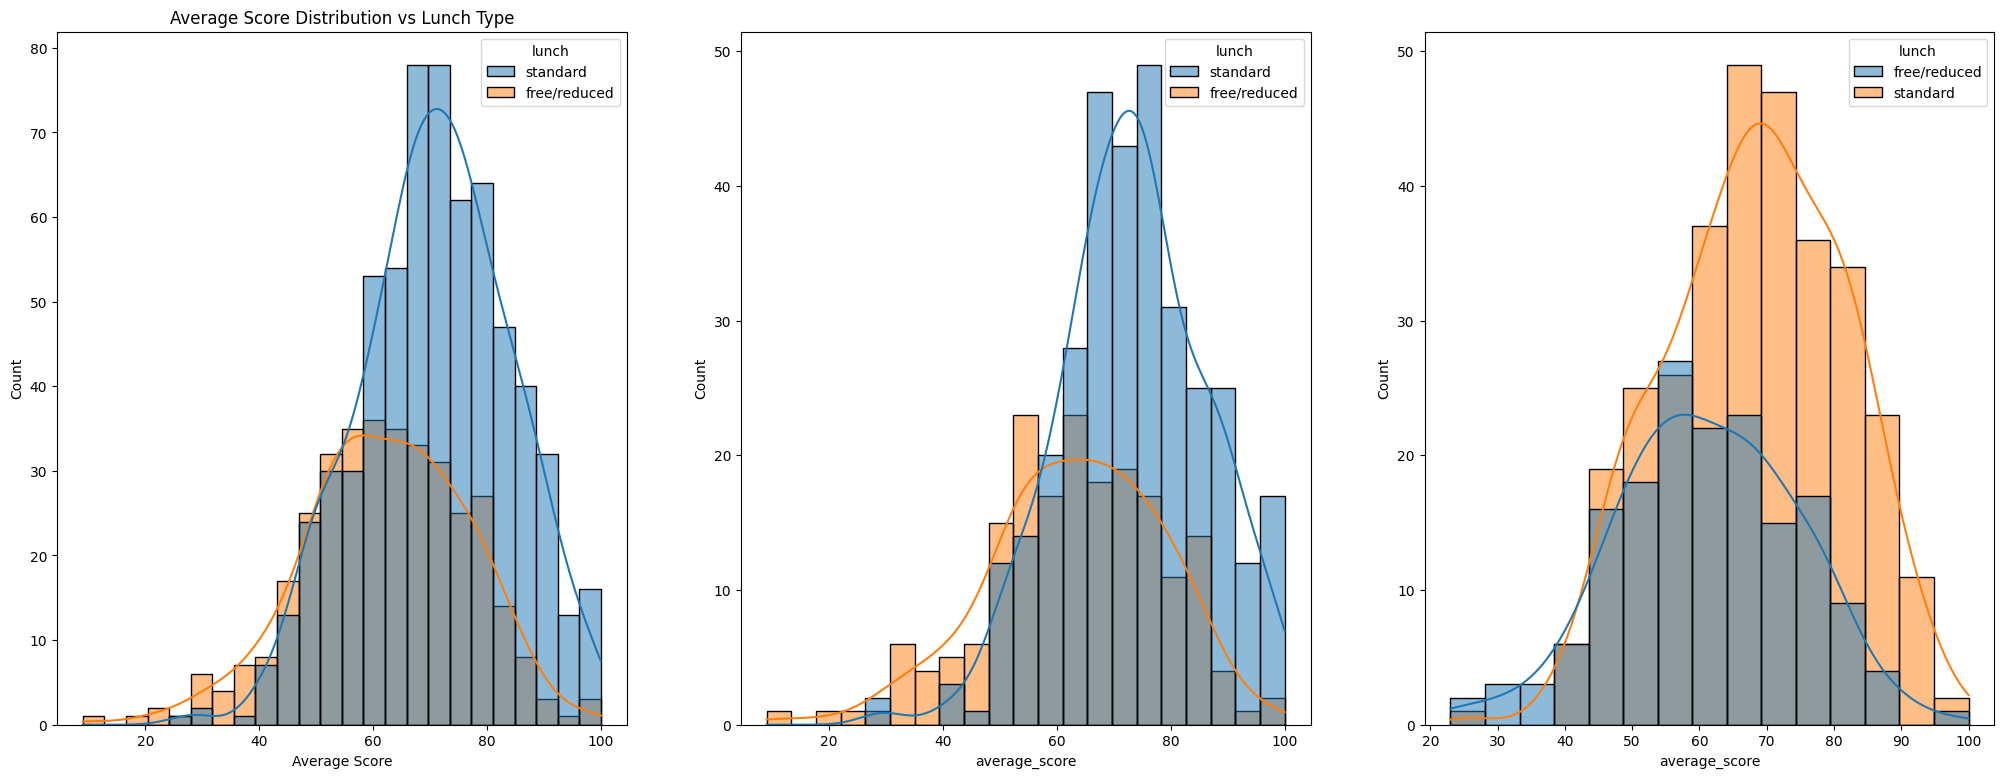

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(25, 9))
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue= 'lunch', kde=True, color='r')
plt.title('Average Score Distribution vs Lunch Type')
plt.xlabel('Average Score')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', hue='lunch', kde=True, color='b')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', hue='lunch', kde=True, color='orange')
plt.show()


### Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

In [21]:
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

<Axes: xlabel='average_score', ylabel='Count'>

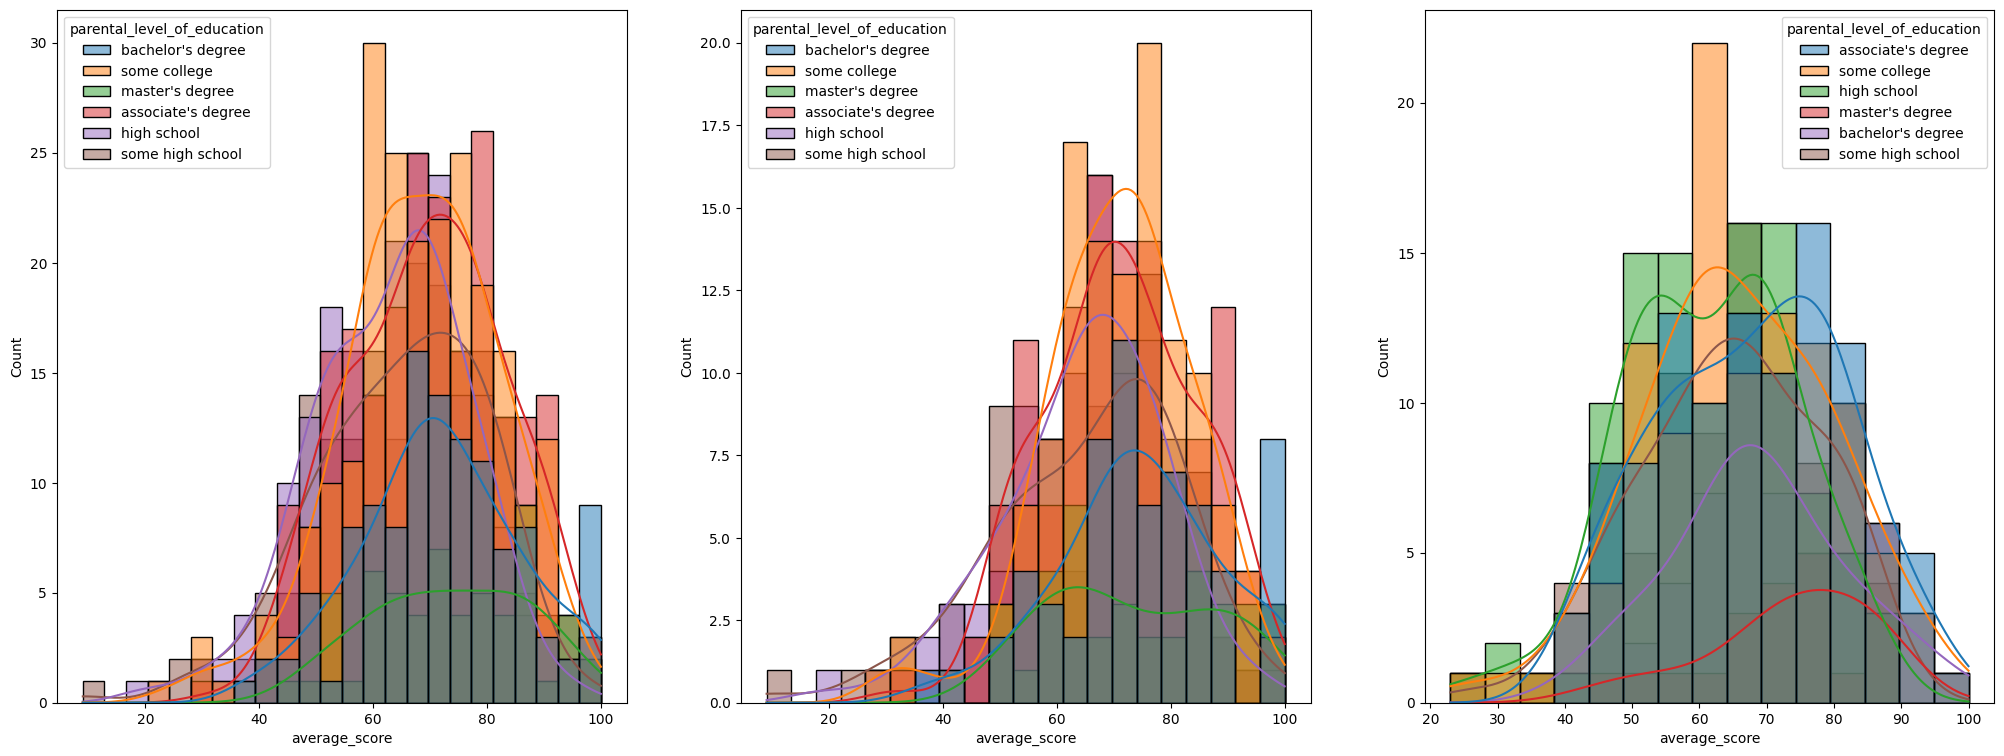

In [22]:
fig , axs = plt.subplots(1,3, figsize=(25,9))
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue='parental_level_of_education', kde=True, color='r')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', hue='parental_level_of_education', kde=True, color='b')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', hue='parental_level_of_education', kde=True, color='orange')

### Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

In [23]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

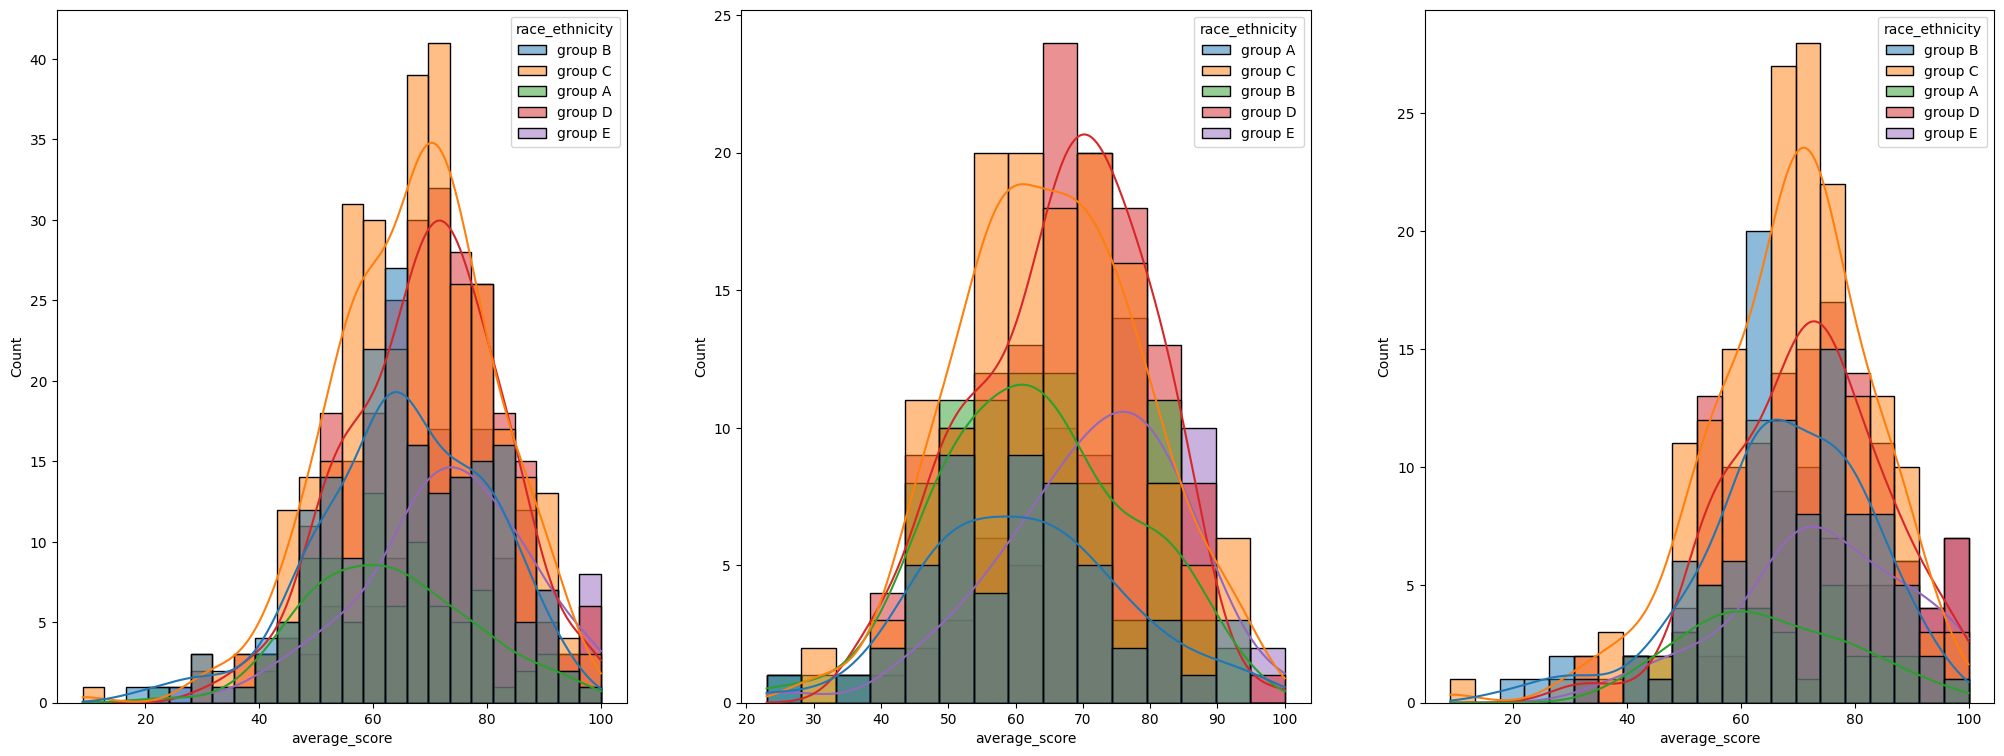

In [25]:
plt.subplots(1,3 , figsize=(25,9))
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue='race_ethnicity', kde=True, color='r')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average_score', hue='race_ethnicity', kde=True, color='b')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average_score' , hue = 'race_ethnicity', kde=True, color='orange')
plt.show()

### Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

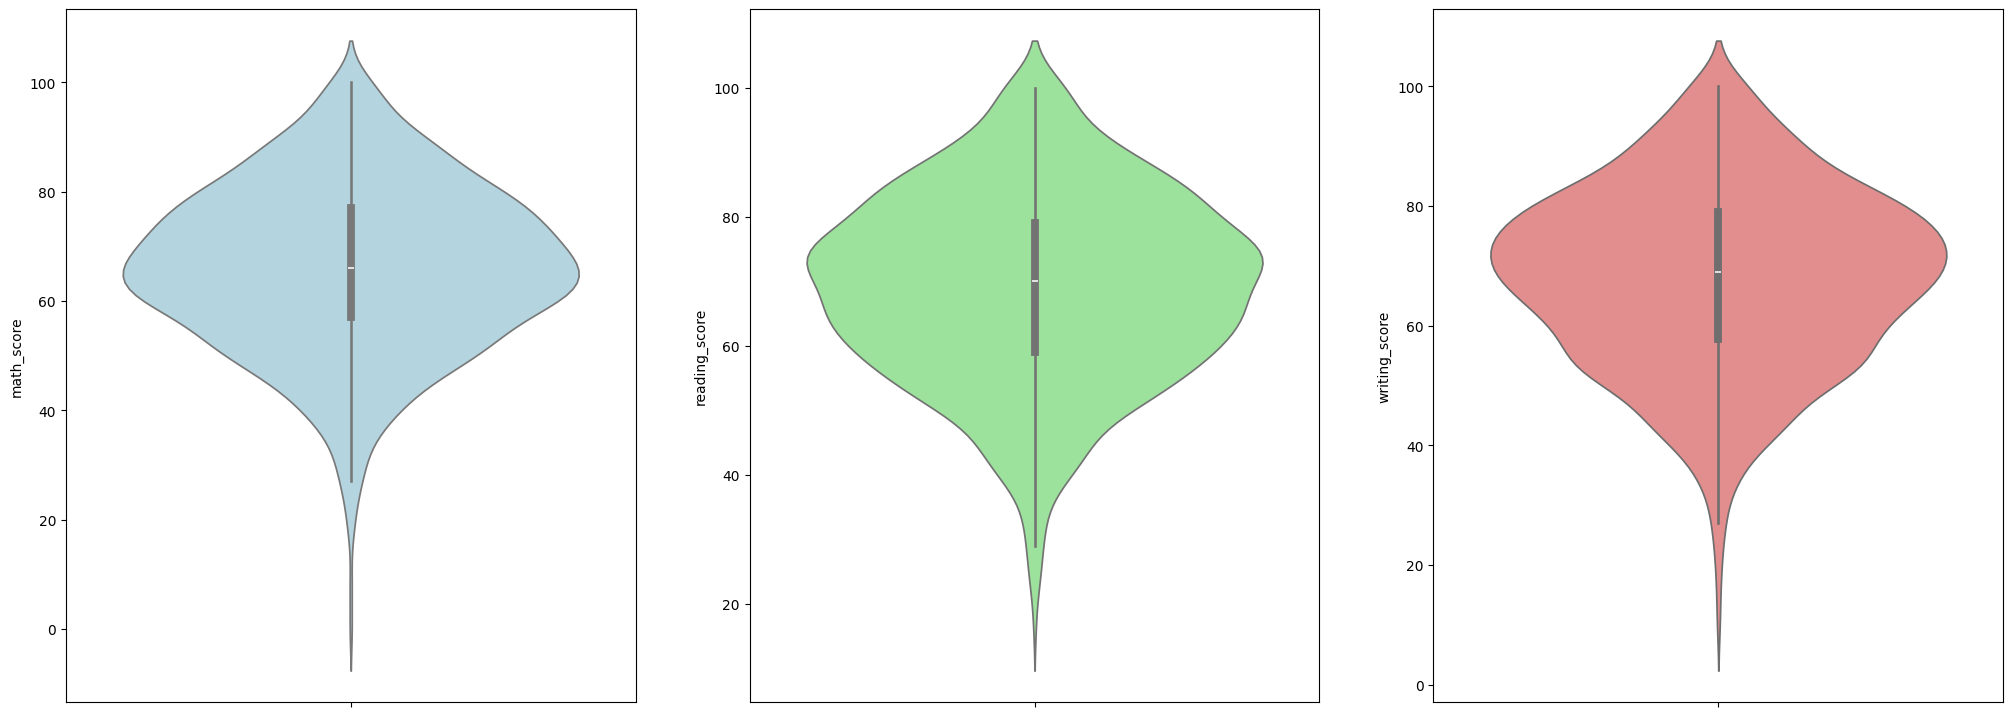

In [27]:
plt.subplots(1,3, figsize=(25,9))
plt.subplot(131)
sns.violinplot(y = 'math_score' , data = df , color = 'lightblue')

plt.subplot(132)
sns.violinplot(y = 'reading_score' , data = df , color = 'lightgreen')

plt.subplot(133)
sns.violinplot(y = 'writing_score' , data = df , color = 'lightcoral')
plt.show()

### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## 4.3 Multivariate analysis using pieplot

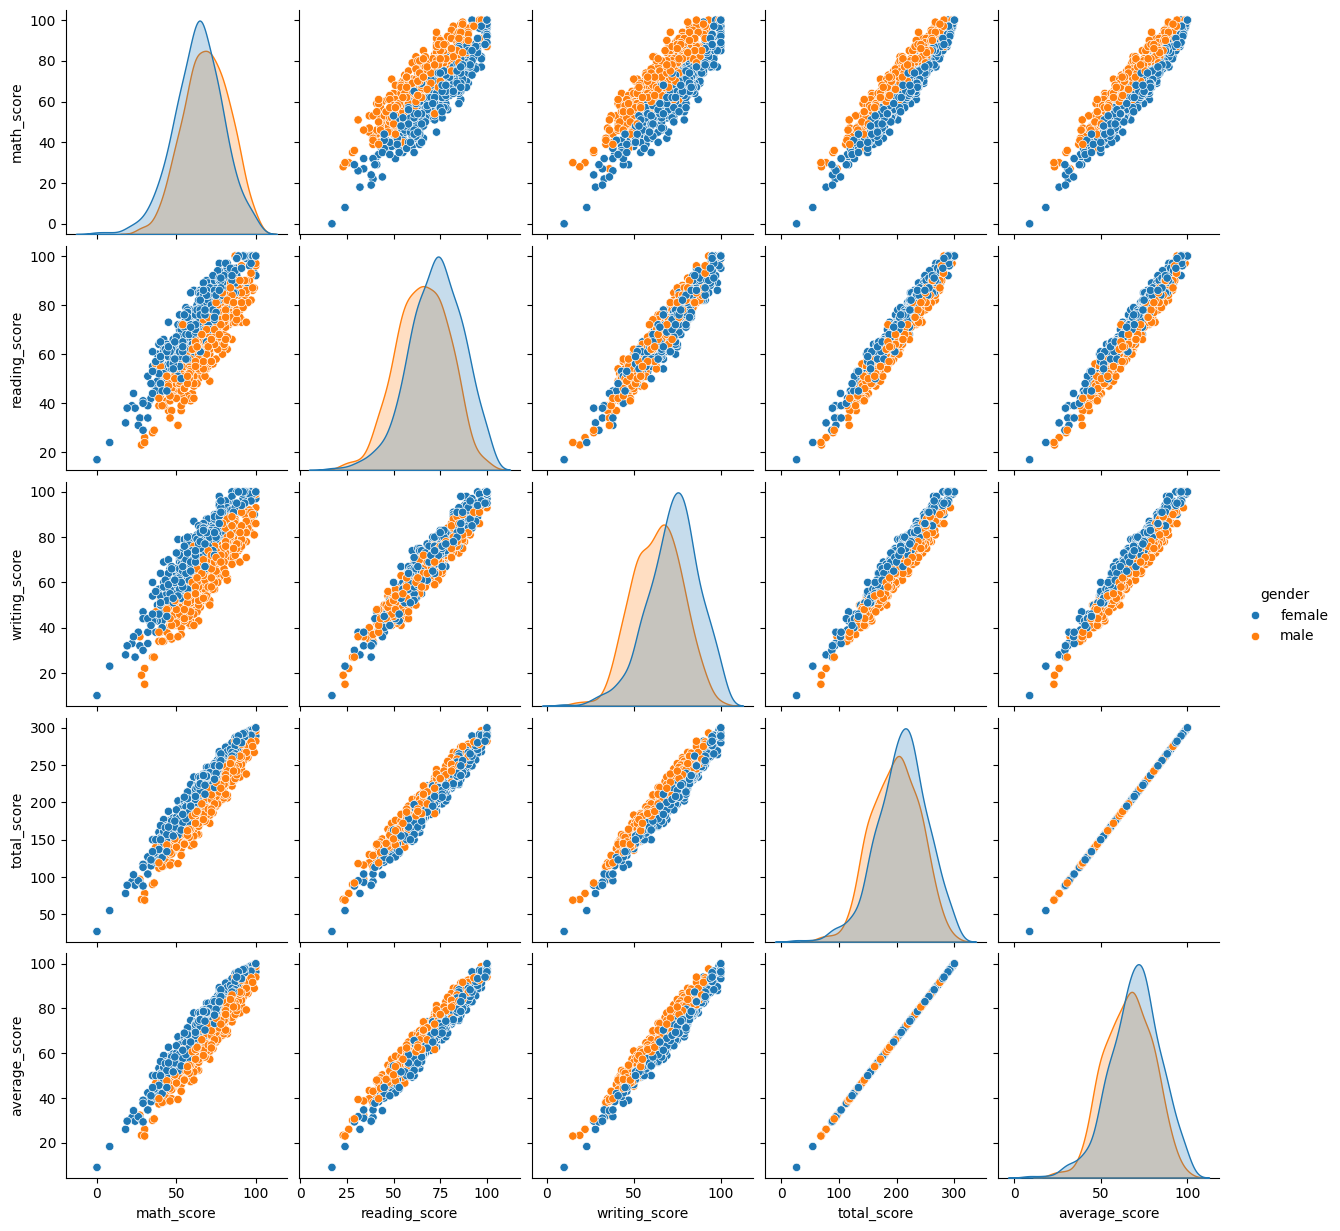

In [68]:
sns.pairplot(df , hue='gender')

### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

In [32]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

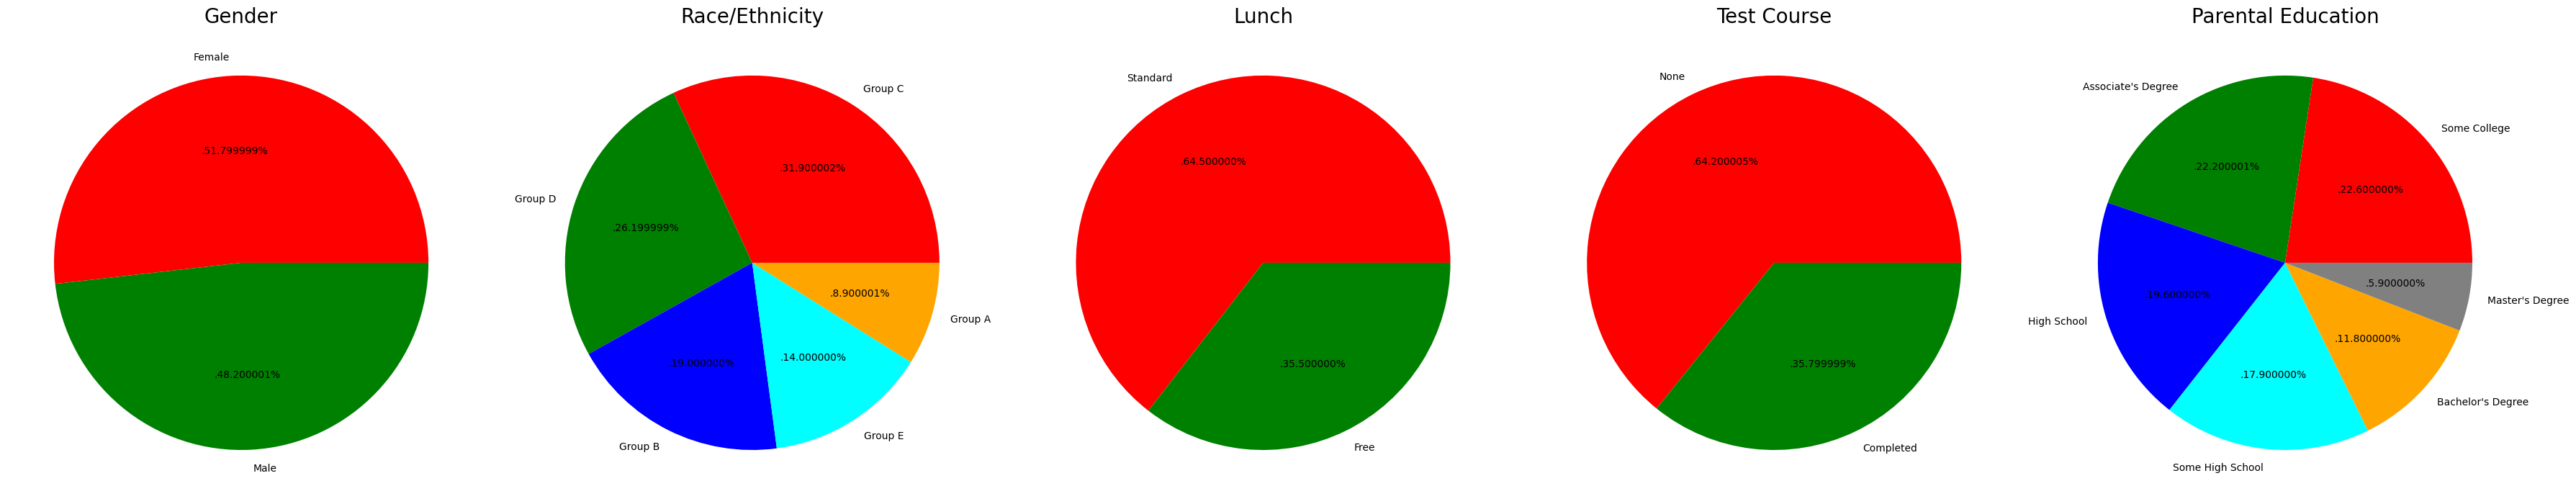

In [37]:
plt.rcParams['figure.figsize'] = (36, 49)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

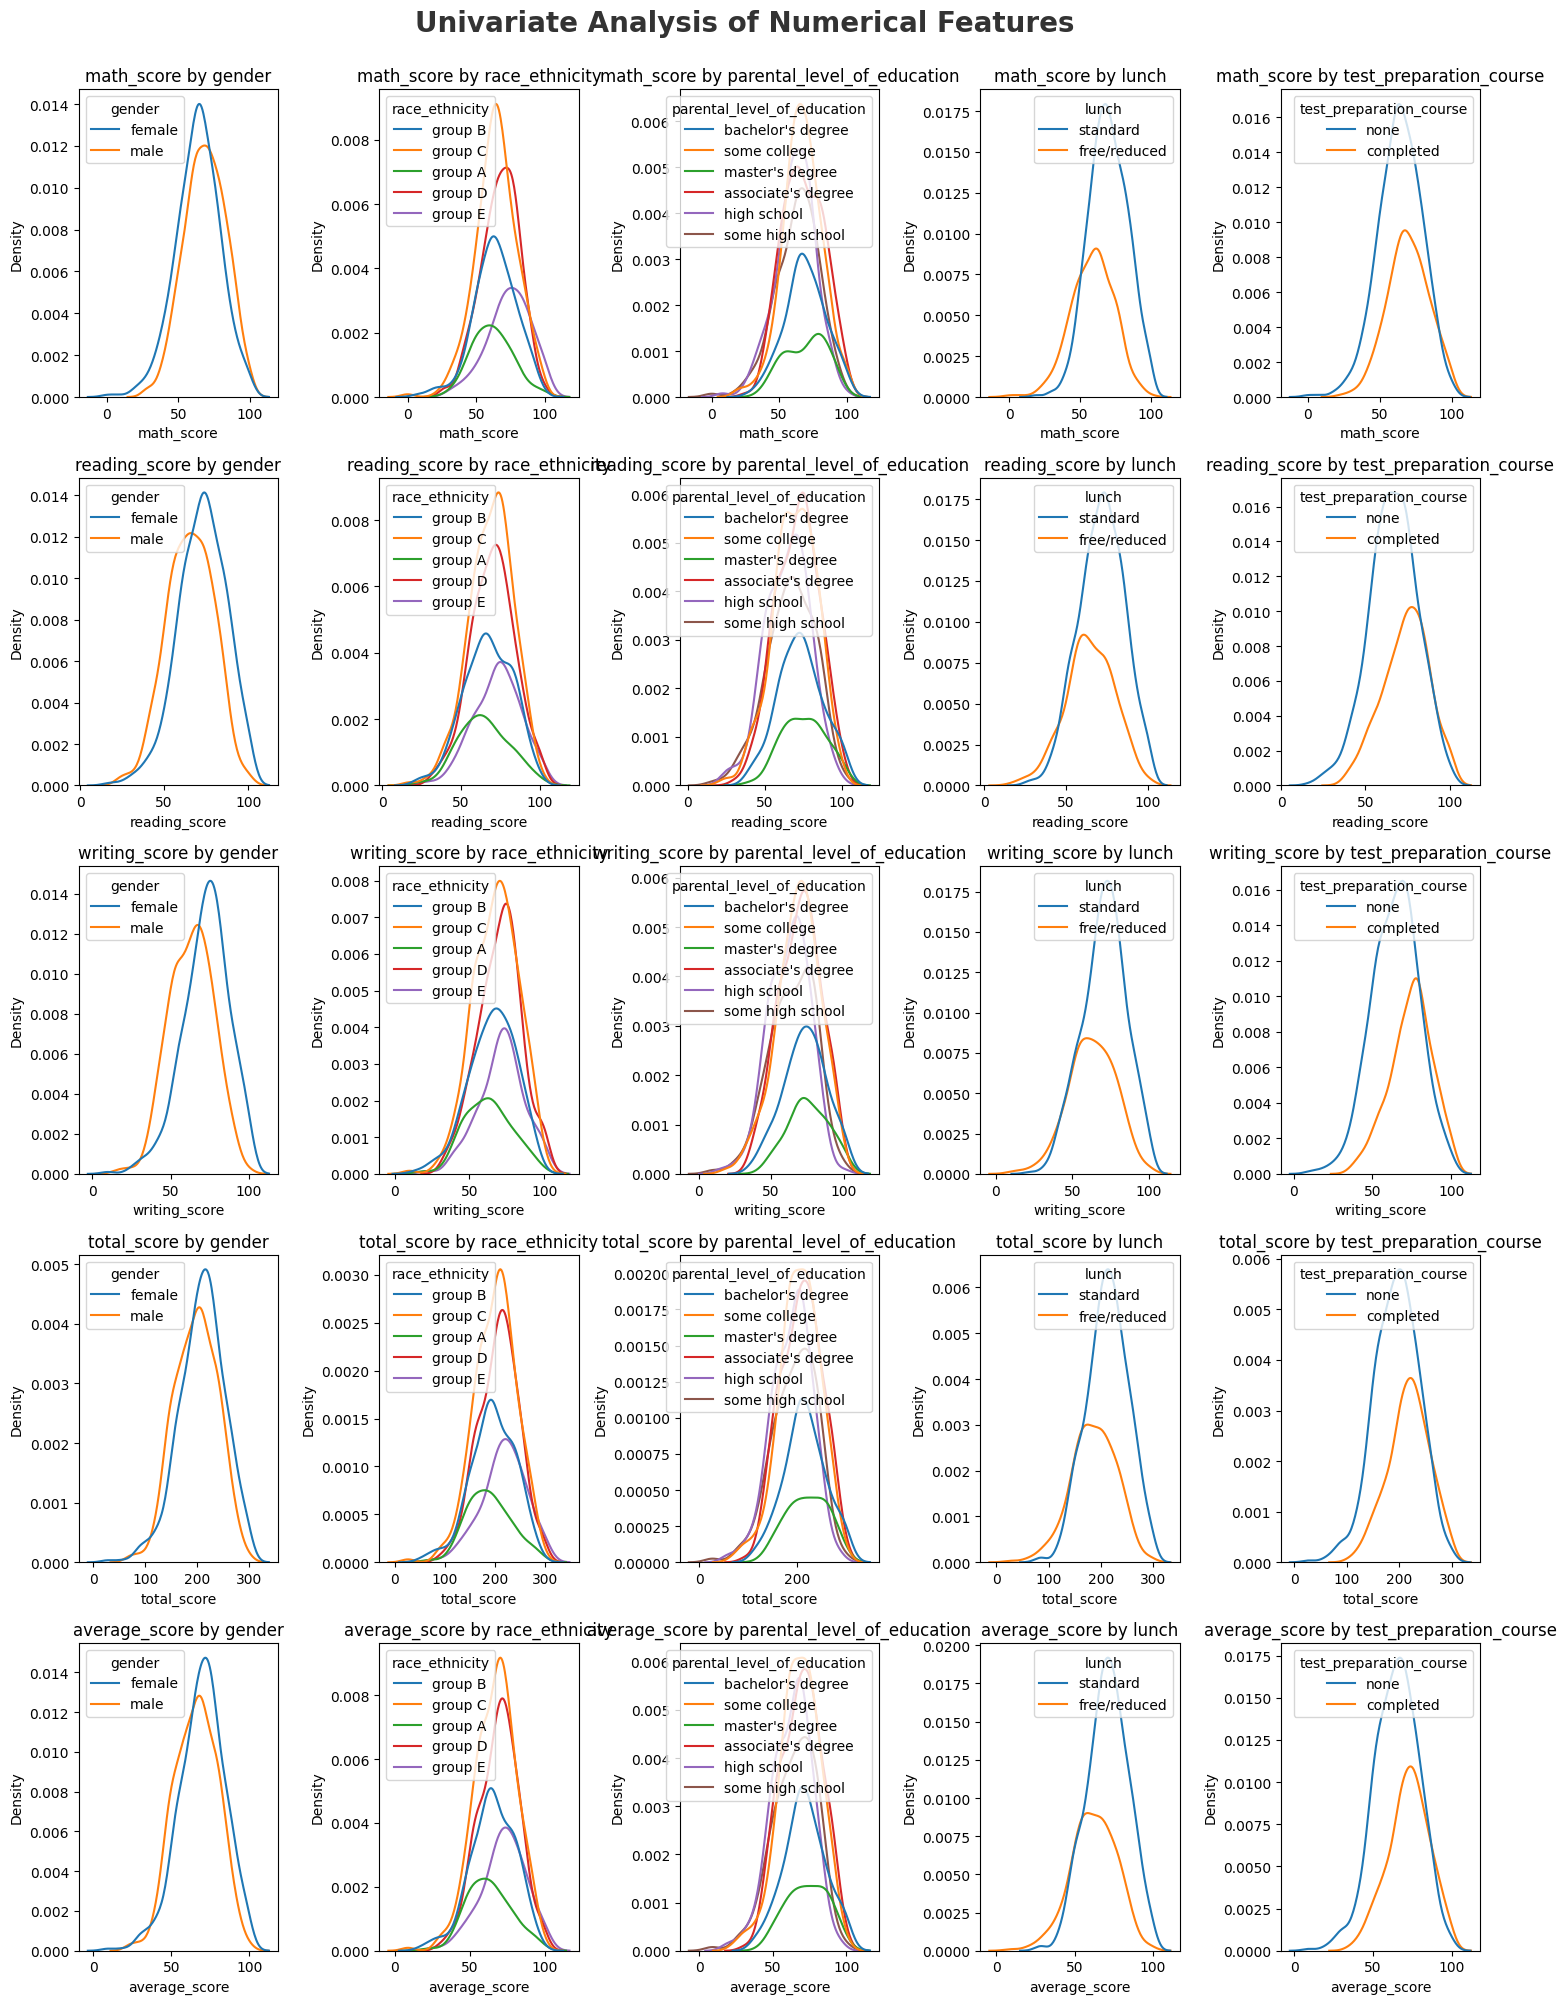

In [54]:
total_plots = len(num_cols) * len(cat_cols)
plt.figure(figsize=(15, 4 * len(num_cols)))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

plot_number = 1
for i in range(len(num_cols)):
    for j in range(len(cat_cols)):
        plt.subplot(len(num_cols), len(cat_cols), plot_number)
        sns.kdeplot(data=df, x=num_cols[i], hue=cat_cols[j])
        plt.xlabel(num_cols[i])
        plt.title(f"{num_cols[i]} by {cat_cols[j]}")
        plot_number += 1
plt.tight_layout()
plt.show()


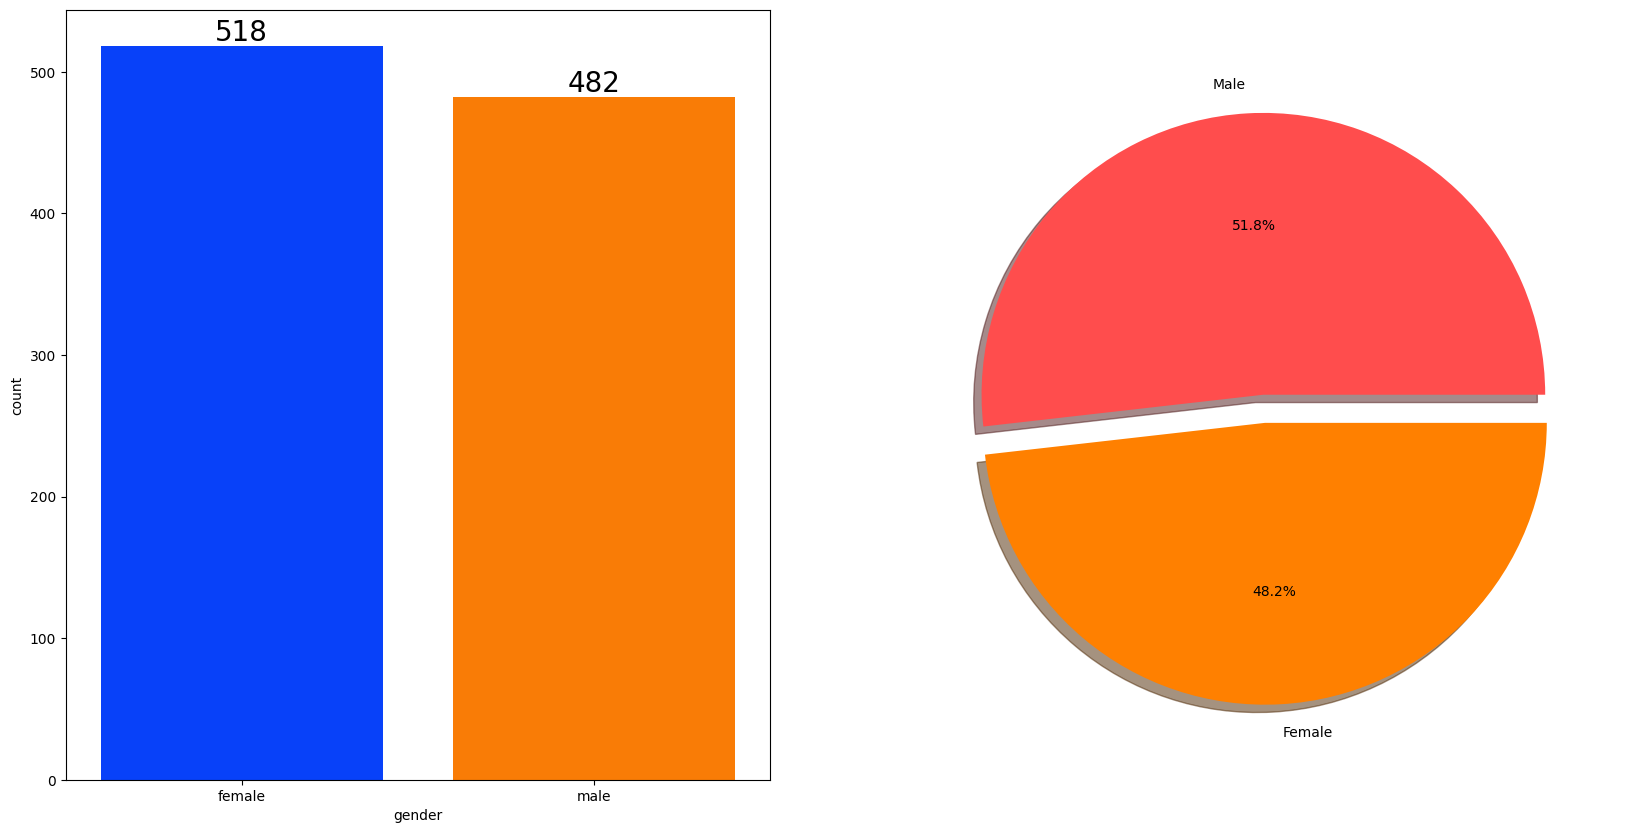

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

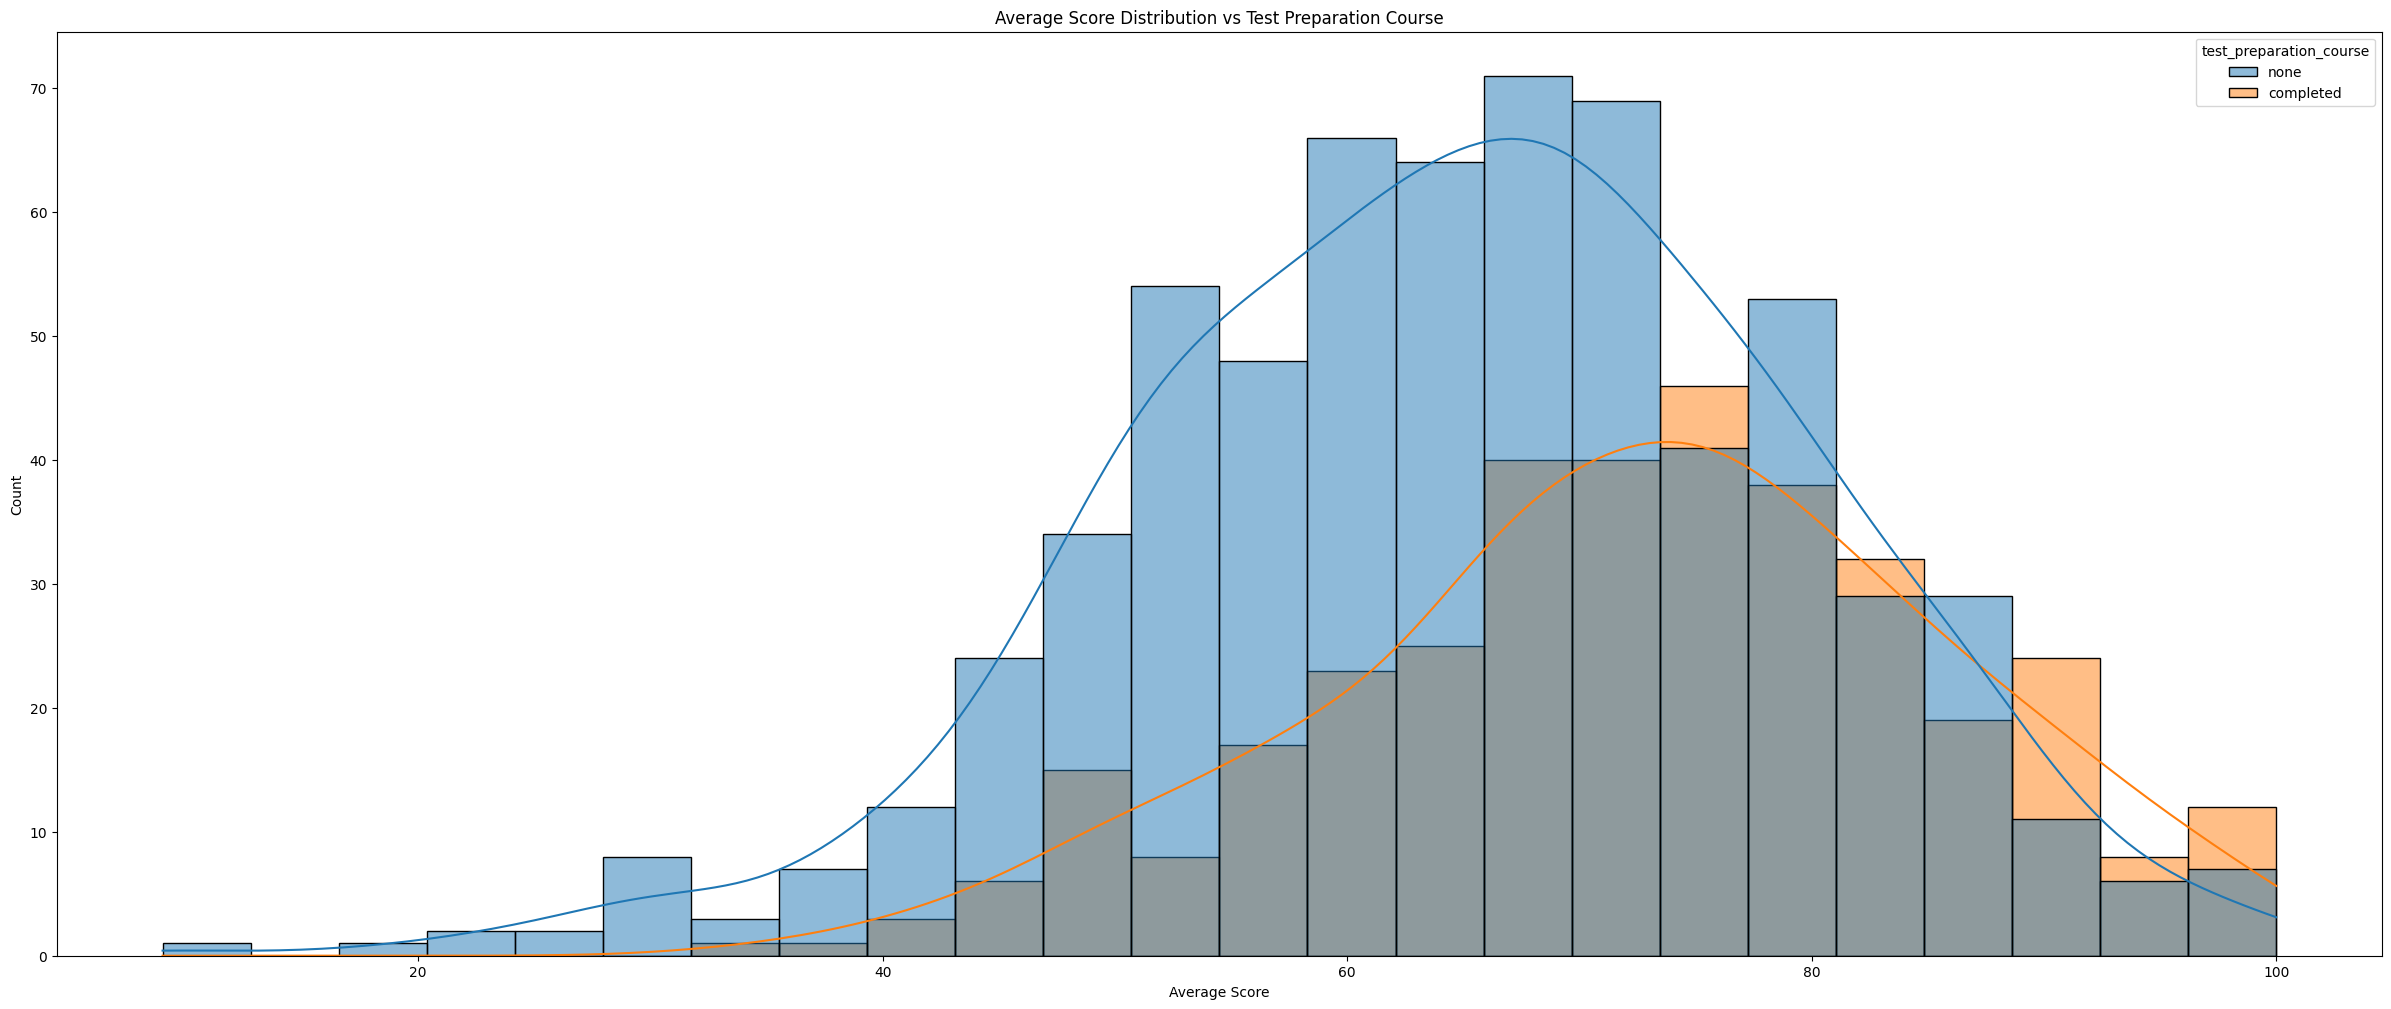

In [ ]:
sns.histplot(data=df, x='average_score', kde=True, hue='test_preparation_course', color='purple')
plt.title('Average Score Distribution vs Test Preparation Course')
plt.xlabel('Average Score')
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

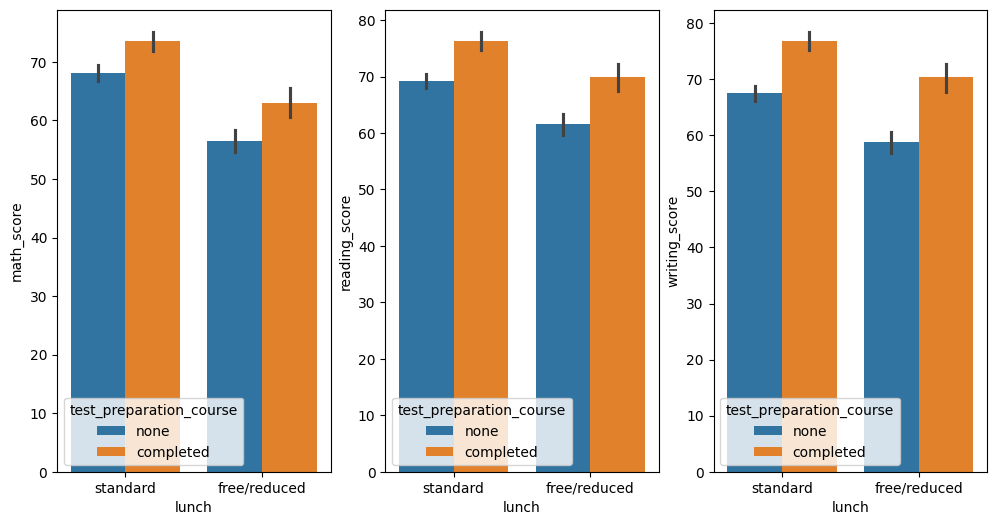

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

### Comparative Analysis
* Central Tendency: Students who completed the test preparation course (“completed”) tend to have both a higher score distribution and higher peak than those who didn’t.

* Skewness: The scores of students who did not complete the course are more spread out and generally peak at lower average scores (left side of the plot).

* Score Range: Students with completed preparation are more likely to score above 70, whereas those without preparation are more frequent in the 50–70 score range.

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance) ?

In [59]:
gender_group = df.groupby('gender')[num_cols].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


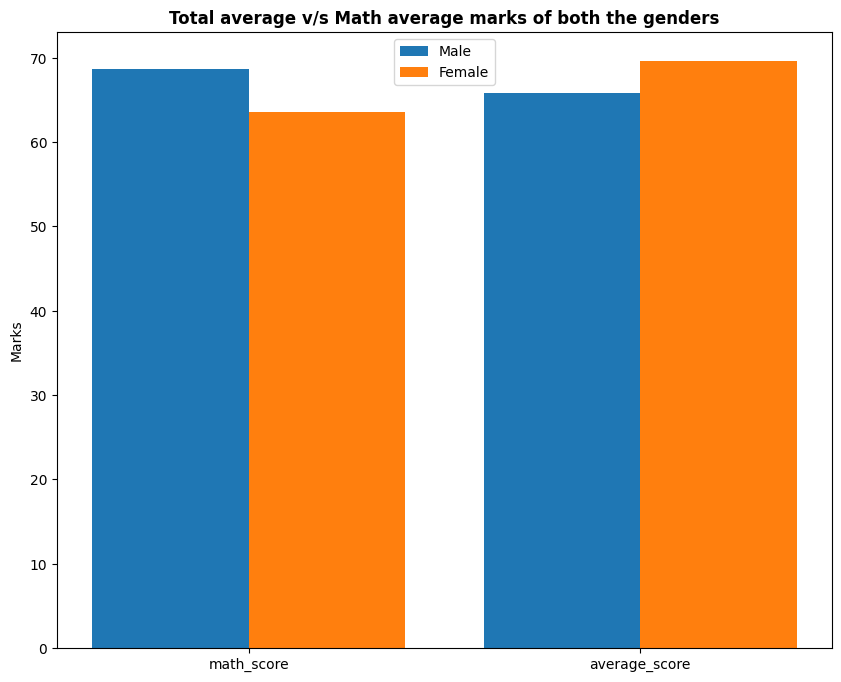

In [67]:
plt.figure(figsize=(10, 8))
X = ['math_score', 'average_score']
female_scores = [gender_group.loc['female', 'math_score'], gender_group.loc['female', 'average_score']]
male_scores = [gender_group.loc['male', 'math_score'], gender_group.loc['male', 'average_score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

## CHECKING OUTLIERS

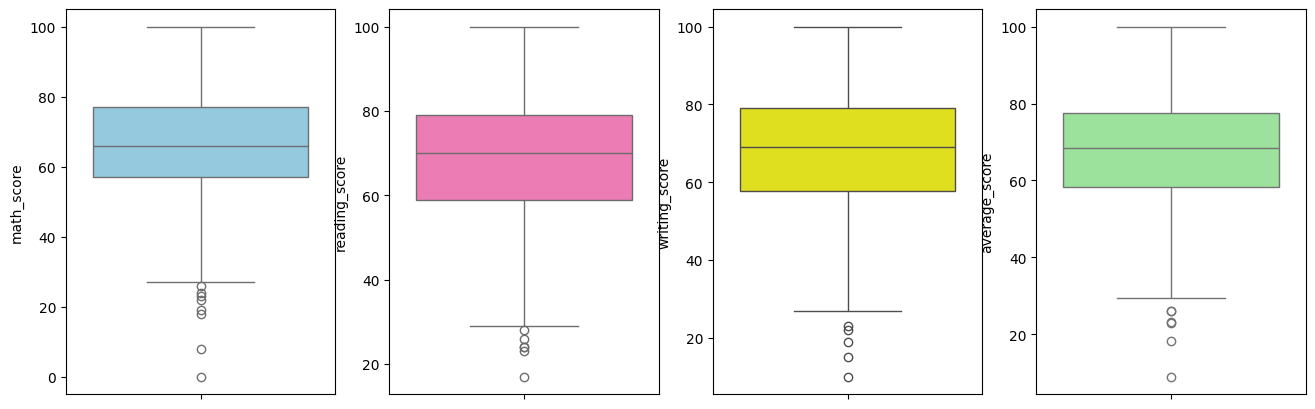

In [75]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

### 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial